# Importig Libraries - Importation de bibliothèques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set()

## Loading Data  - Chargement des données

In [3]:
data = pd.read_csv("Market-Segmentation.csv")
dataset = data.copy()
dataset.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


The data is from a retail shop's survey where,
customers were asked to rate their satisfaction between 1 to 10.
Brand Loyalty was then calculated using churn rate with a range between -2.5 to 2.5.

Les données proviennent de l'enquête d'un magasin de détail où,
les clients ont été invités à évaluer leur satisfaction entre 1 et 10.
La fidélité à la marque a ensuite été calculée en utilisant le taux de désabonnement avec une fourchette de -2,5 à 2,5.

#### Ploting Satisfaction against Loyalty  Diagramme de dispersion de la satisfaction et de la loyauté

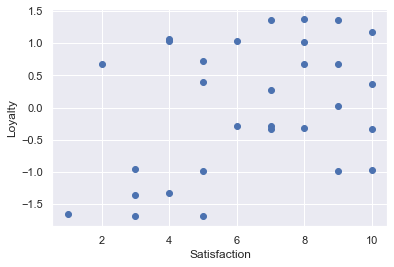

In [5]:
plt.scatter(dataset["Satisfaction"],dataset["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

### Select Cluster Variables - Sélectionner les variables de la grappe

In [7]:
x = dataset
x.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [8]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [11]:
cluster_results = kmeans.fit_predict(x)
cluster_results

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1])

In [13]:
# Create a DataFrame containing cluster_results  - Créer un DataFrame contenant cluster_results

clusterd_data = data.copy()
clusterd_data["Clusters"] = cluster_results
clusterd_data.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1


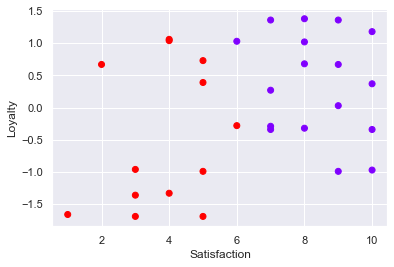

In [14]:
plt.scatter(clusterd_data["Satisfaction"],clusterd_data["Loyalty"], c=clusterd_data["Clusters"],
           cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [15]:
# From the results, it seem the clustering was made based on only one variable, "Satisfaction",
# this is because its values are much higher than that of "Loyalty".
# This could be a good reason to standartize the values

# D'après les résultats, il semble que le clustering ait été effectué sur la base d'une seule variable, 
# la "Satisfaction",car ses valeurs sont beaucoup plus élevées que celles de la "Loyauté".
# Cela pourrait être une bonne raison pour standardiser les valeurs.

### Standardize the variables  - Normaliser les variables

In [16]:
# Using Preprocessing from sklearn, the variables can be standardized
# En utilisant Preprocessing de sklearn, les variables peuvent être normalisées.

In [19]:
from sklearn import preprocessing

In [20]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [21]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# I have chosen to get solutions from 1 to 9 clusters representing the 10 possible Satisfaction levels
# J'ai choisi d'obtenir des solutions de 1 à 9 clusters représentant les 10 niveaux de satisfaction possibles.

for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.423830011052963,
 4.492446080195153,
 3.8067995963754537]

Text(0, 0.5, 'WCSS')

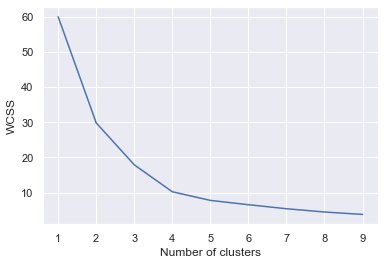

In [23]:
# Plot the number of clusters vs WCSS - Tracez le nombre de clusters en fonction du WCSS.
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [24]:
# The results of the graph is inconclusive as four points of interest(2,3,4 and 5) can be seen.
# It is now left for me to tryout various point numbers from the to see which works best

# Les résultats du graphique ne sont pas concluants car on peut voir quatre points d'intérêt (2, 3, 4 et 5).
# Il me reste maintenant à essayer différents numéros de points du graphique pour voir lequel fonctionne le mieux.

In [45]:
kmeans_scaled = KMeans(5)
kmeans_scaled.fit(x_scaled)
result_kmeans_scaled = kmeans_scaled.fit_predict(x_scaled)
result_kmeans_scaled

array([1, 3, 1, 3, 0, 1, 2, 3, 4, 4, 2, 0, 1, 0, 3, 4, 4, 4, 3, 4, 4, 1,
       0, 1, 0, 2, 2, 2, 1, 0])

In [46]:
# The plot scale needs to be the actual values even though the solution has been standardize
# L'échelle du graphique doit correspondre aux valeurs réelles, même si la solution a été normalisée.

x_scaled_clustered = x.copy()
x_scaled_clustered["Clustered"] =  result_kmeans_scaled
x_scaled_clustered.head()

,Satisfaction,Loyalty,Clustered
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,0


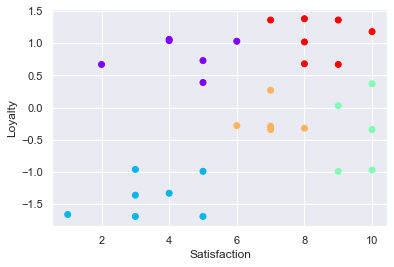

In [47]:
plt.scatter(x_scaled_clustered["Satisfaction"],x_scaled_clustered["Loyalty"], 
            c=x_scaled_clustered["Clustered"], cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [50]:
# Using k = 2, I have results almost as that before standardization but a bit different
# En utilisant k = 2, j'obtiens des résultats presque identiques à ceux obtenus avant la normalisation,
# mais un peu différents.

# K = 5 was finally chosen as it better explained the segmentation of customers, beyond K = 5, 
# major segmented groups of customers were further segmented

# K = 5 a finalement été choisi car il explique mieux la segmentation des clients, au-delà de K = 5, 
# les principaux groupes de clients ont été segmentés davantage

In [51]:
# From Left to Right, I can observe Alienated, Surpporters, Roamers and Fans as groups of Customers

# De gauche à droite, je peux observer les Aliénés, les Supporters, les Rôdeurs et les Fans 
# comme des groupes de clients.

In [59]:

![](Clustering-Results.png)

'[]' is not recognized as an internal or external command,
operable program or batch file.


From the results of the above clustering, strategies can be implemented to turn the surpporters into fan,
Roamers into Surpporters and rewards for Fans like fidelity programs.

Information about our fans could be gathered for targetd Ads campaigns for them or
other people with similar similarities.

À partir des résultats du regroupement ci-dessus, des stratégies peuvent être mises en œuvre pour transformer les sur-supporters en fans,
les roamers en Surpporters et des récompenses pour les Fans comme des programmes de fidélité.

Les informations sur nos fans peuvent être collectées pour des campagnes publicitaires ciblées pour eux ou pour d'autres personnes présentant des similitudes.
d'autres personnes présentant des similitudes.